In [426]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [427]:
data = pd.read_csv("d.csv", usecols=['Timestamp','average'],nrows=36)


In [428]:
data.head()


,average,Timestamp
0,28,1/1/2018
1,29,2/1/2018
2,28,3/1/2018
3,29,4/1/2018
4,29,5/1/2018


<AxesSubplot: >

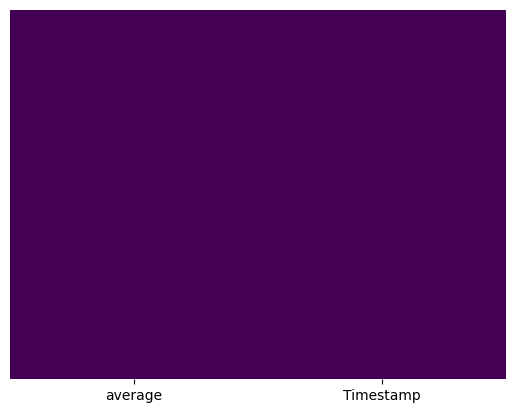

In [429]:
#Make sure there are no null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [430]:
data.isnull().value_counts()

average  Timestamp
False    False        36
dtype: int64

In [431]:
#Check the datatypes
print(data.dtypes)

average       int64
Timestamp    object
dtype: object


In [432]:
data['Timestamp']=pd.to_datetime(data['Timestamp'])

In [433]:
data.dtypes

average               int64
Timestamp    datetime64[ns]
dtype: object

In [434]:
data.head()

,average,Timestamp
0,28,2018-01-01
1,29,2018-02-01
2,28,2018-03-01
3,29,2018-04-01
4,29,2018-05-01


<AxesSubplot: xlabel='Time period', ylabel='Average period cycle'>

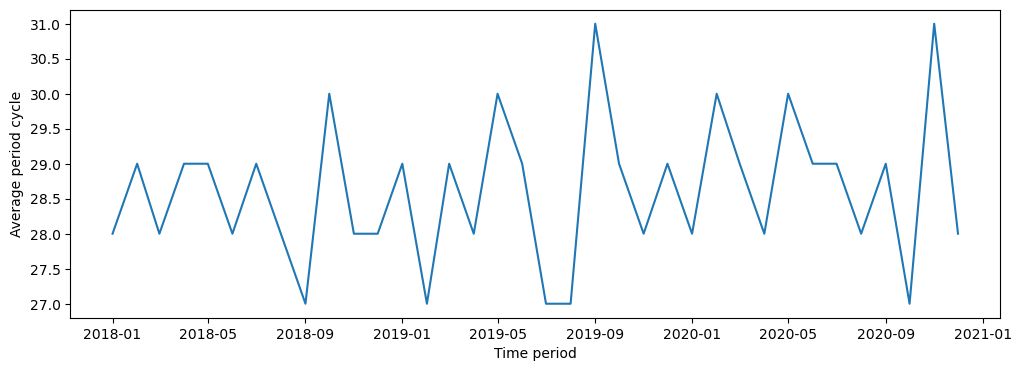

In [435]:
# To understand the pattern
plt.figure(figsize=(12,4))
plt.xlabel("Time period")
plt.ylabel("Average period cycle")
sns.lineplot(data=data, x='Timestamp', y= 'average')

In [436]:
#Set the index of the Month 
data.set_index('Timestamp',inplace=True)


In [437]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.01, False)

<AxesSubplot: xlabel='Timestamp'>

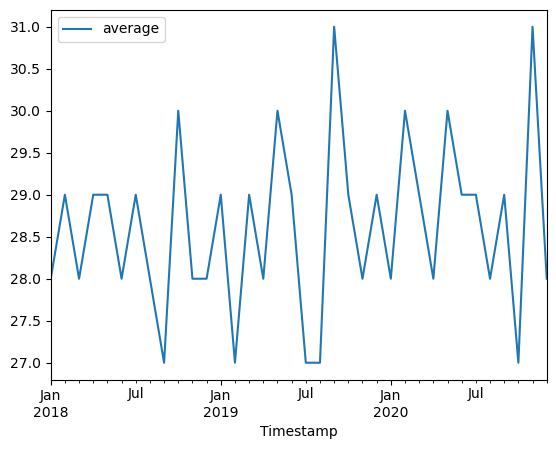

In [438]:
data.plot()

In [439]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Function to make a time series stationary
def make_stationary(timeseries):
    d = 0
    p_value = 1
    while p_value > 0.05:
        # Perform Dickey-Fuller test
        dftest = adfuller(timeseries, autolag='AIC')
        p_value = dftest[1]
        if p_value > 0.05:
            timeseries = timeseries.diff().dropna()
            d += 1
    return timeseries, d

# Example usage
timeseries = data
stationary_series, d = make_stationary(timeseries)
print(f'Number of differencing: {d}')


Number of differencing: 0


In [440]:
#testing for stationarity
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Function to check if time series is stationary
def is_stationary(timeseries):
    # Perform Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    p_value = dftest[1]
    if p_value <= 0.05:
        return True
    else:
        return False

# Example usage
timeseries = data
result = is_stationary(timeseries)
print(result)


True


In [441]:
# spilting the dataset
from sklearn.model_selection import train_test_split

X = data # dataset

train_size = 0.75
test_size = 1 - train_size

X_train, X_test = train_test_split(X, train_size=train_size, test_size=test_size, shuffle=False)


In [442]:
X_train.tail()

,average
Timestamp,
2019-11-01,28
2019-12-01,29
2020-01-01,28
2020-02-01,30
2020-03-01,29


In [443]:
X_test.tail()

,average
Timestamp,
2020-08-01,28
2020-09-01,29
2020-10-01,27
2020-11-01,31
2020-12-01,28


In [444]:
X_test.head()

,average
Timestamp,
2020-04-01,28
2020-05-01,30
2020-06-01,29
2020-07-01,29
2020-08-01,28


Text(0, 0.5, 'CycleLength')

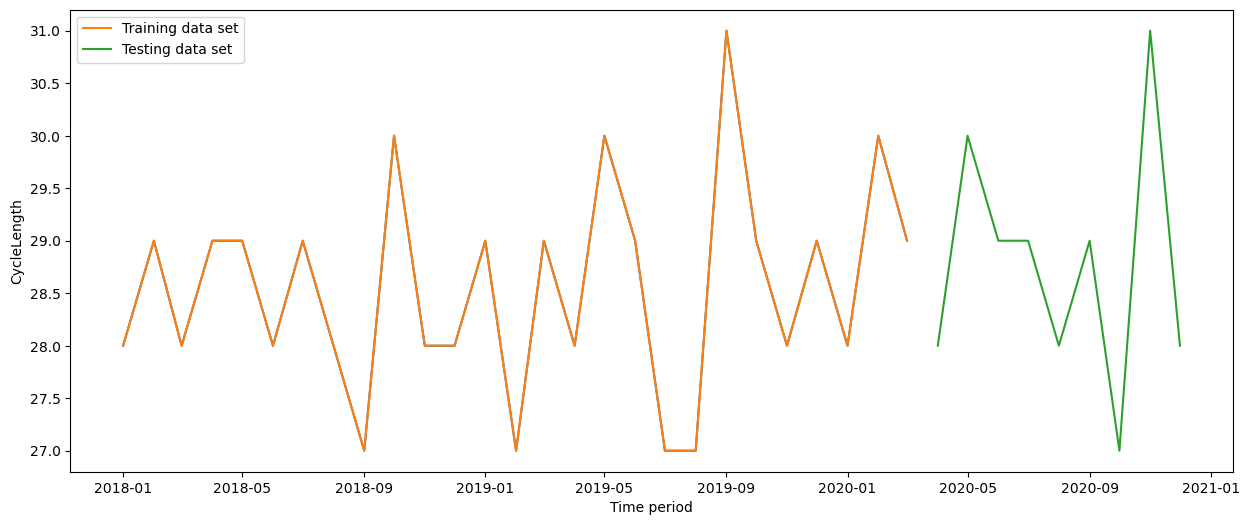

In [445]:
plt.figure(figsize=(15,6))
plt.plot(X_train)
plt.xlabel("Time period")
plt.ylabel("Average period cycle")
plt.plot(X_train,label="Training data set")
plt.plot(X_test,label="Testing data set")
plt.xlabel('Time period')
plt.legend(loc = 'best')
plt.ylabel('CycleLength')



In [446]:
arima_model =  auto_arima(X_train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=1, seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=102.381, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=96.634, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=100.396, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=91.243, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=91.263, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=89.333, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=94.681, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=89.381, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=81.103, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=82.404, Time=0.03 sec
 ARIMA(2,1

In [447]:

prediction = pd.DataFrame(arima_model.predict(n_periods = 100),index=X_test.index)
prediction.columns = ['predicted_Cyclelength']
prediction

,predicted_Cyclelength
Timestamp,
2020-04-01,28.005550
2020-05-01,28.731052
2020-06-01,28.825630
2020-07-01,28.528508
2020-08-01,28.602928
2020-09-01,28.683236
2020-10-01,28.626940
2020-11-01,28.618464
2020-12-01,28.641935


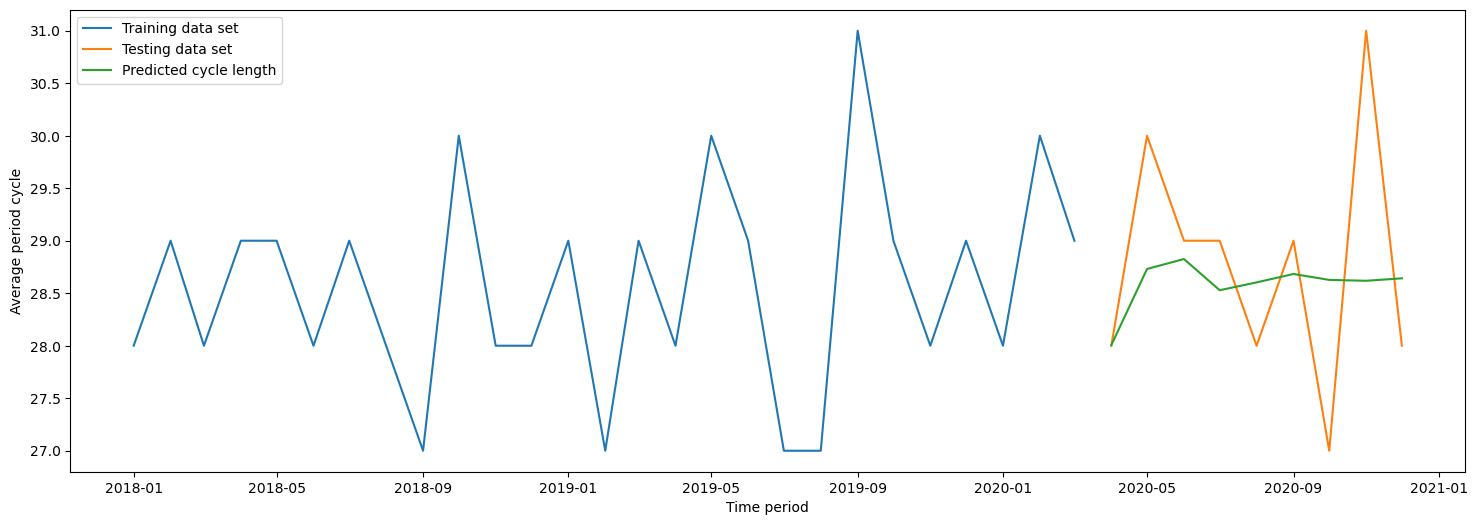

In [448]:
plt.figure(figsize=(18,6))
plt.plot(X_train,label="Training data set")
plt.plot(X_test,label="Testing data set")
plt.plot(prediction,label="Predicted cycle length")
plt.legend(loc = 'best')
plt.xlabel("Time period")
plt.ylabel("Average period cycle")
plt.show()

In [449]:
X_full = pd.concat([X_train, X_test])
arima_model.fit(X_full)
future_predictions = arima_model.predict(n_periods=10)

future_predictions_df = pd.DataFrame(future_predictions, index=pd.date_range(start=X_test.index[-1], periods=10, freq='D'))
future_predictions_df.columns = ['predicted_Cyclelength']



In [450]:
print(future_predictions)

2021-01-01    28.420344
2021-02-01    29.111546
2021-03-01    28.656690
2021-04-01    28.668308
2021-05-01    28.797980
2021-06-01    28.732636
2021-07-01    28.725275
2021-08-01    28.748213
2021-09-01    28.739454
2021-10-01    28.736816
Freq: MS, dtype: float64


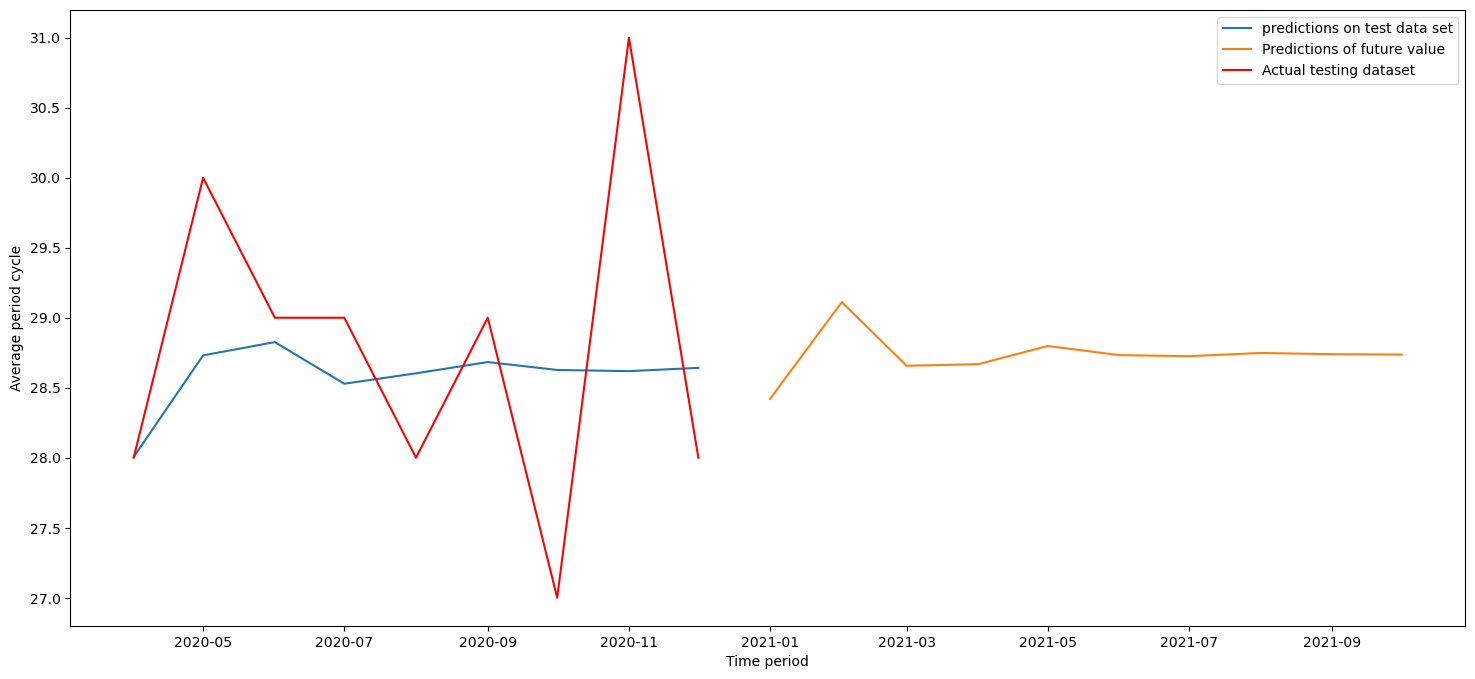

In [462]:
# Concatenate the past values and future predictions
all_prediction = pd.concat([prediction, future_predictions])
plt.figure(figsize=(18,8))
# Plot the past values and future predictions
plt.plot(prediction,label='predictions on test data set')
plt.plot(future_predictions, label = 'Predictions of future value')

plt.plot(X_test, label = 'Actual testing dataset', color='r')
plt.legend(loc='best')
plt.xlabel("Time period")
plt.ylabel("Average period cycle")
plt.show()
